<a href="https://colab.research.google.com/github/hmh100298/SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

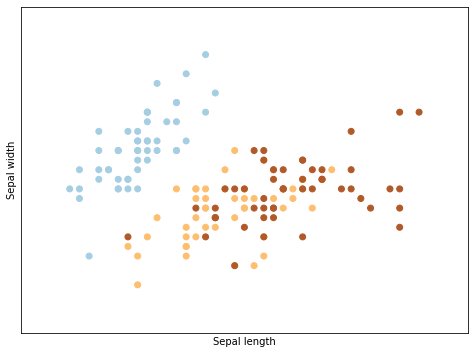

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import numpy as np

iris = datasets.load_iris()

def getData():
  iris = datasets.load_iris()
  return iris

def get2DPlot(iris):
  X = iris.data[:,:2]
  Y = iris.target
  X_min, X_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  Y_min, Y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  plt.figure(2, figsize=(8,6))
  plt.clf()
  plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')

  plt.xlim(X_min, X_max)
  plt.ylim(Y_min, Y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()

get2DPlot(getData())

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


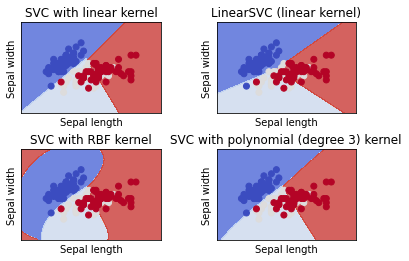

In [ ]:
X = iris.data[:,:2]
y = iris.target
h = 0.01 # buoc do thi
  
C = 1.0 #SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
titles = ['SVC with linear kernel',
'LinearSVC (linear kernel)',
'SVC with RBF kernel',
'SVC with polynomial (degree 3) kernel']
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()